In [1]:
%reset
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
import warnings; warnings.filterwarnings('ignore')
print('ready')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
ready


In [2]:
grid_data=xr.open_zarr("/scratch/ag7531/shareElizabeth/grid_dataforeli")
uv_data  =xr.open_zarr("/scratch/ag7531/shareElizabeth/uv_dataforeli")

In [3]:
#Uncomment to print the uv_data information:
#uv_data 

In [4]:
#Uncomment to print the grid_data information:
grid_data

<xarray.Dataset>
Dimensions:         (st_edges_ocean: 51, st_ocean: 50, sw_edges_ocean: 51, sw_ocean: 50, xt_ocean: 3600, xu_ocean: 3600, yt_ocean: 2700, yu_ocean: 2700)
Coordinates:
    area_t          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_u          (yu_ocean, xu_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dxt             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dxu             (yu_ocean, xu_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyu             (yu_ocean, xu_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_c        (yu_ocean, xu_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_e        (yt_ocean, xu_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_n        (yu_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_c        (yu_ocean, xu_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_e        (yt_ocean, xu_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_n        (yu_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_t        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ht              (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    hu              (yu_ocean, xu_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmt             (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmu             (yu_ocean, xu_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * sw_edges_ocean  (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * sw_ocean        (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
    wet             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
  * xt_ocean        (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * xu_ocean        (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yt_ocean        (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.94 89.98
  * yu_ocean        (yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.92 89.96 90.0
Data variables:
    *empty*
Attributes:
    NCO:      4.0.3

We have read in the grid data (dataset grid_data) and the surface velocity data (dataset uv_data) above. The velocity variables are **usurf(time, yu_ocean, xu_ocean)** and **vsurf(time, yu_ocean, xu_ocean)** defined at points **(xu_ocean, yu_ocean)** which can be found in the 'Coordinates' of the velocity data or grid data. The values given by **xu_ocean** and **yu_ocean** (1D arrays) are identical between the two files. We read in the latitude and longitude points from the grid_data file, these variables are **geolat_c(yu_ocean, xu_ocean)** and **geolon_c(yu_ocean, xu_ocean)**. The latitude and longitude we use are the values corresponding to the velocity locations on the B-grid cells. We also read in the zonal grid spacing **dxt** and meridional grid spacing **dyt**; these spacings are defined at tracer points.

In [5]:
##Reading in surface velocity data and the (xu_ocean, yu_ocean) velocity points:
usurf = uv_data.usurf.values[-1,:,:] #Reading in the last time index
vsurf = uv_data.vsurf.values[-1,:,:] #Reading in the last time index
yu_ocean = grid_data.yu_ocean.values 
xu_ocean = grid_data.xu_ocean.values

##Reading in latitude and longitude at velocity points:
geolat = grid_data.geolat_c.values
geolon = grid_data.geolon_c.values
##Reading in the grid spacing for thickness points:
dyt = grid_data.dyt.values
dxt = grid_data.dxt.values
dyu = grid_data.dyu.values
dxu = grid_data.dxu.values
dau = grid_data.area_u.values
print(usurf.shape)
print('finished')

(2700, 3600)
finished


In [6]:
usurf_rounded = np.around(usurf,decimals=4)
vsurf_rounded = np.around(vsurf,decimals=4)
print('done')

done


### Plotting the unfiltered u velocity (note this takes several minutes to plot on the PlateCarree projection)

in progress
almost done


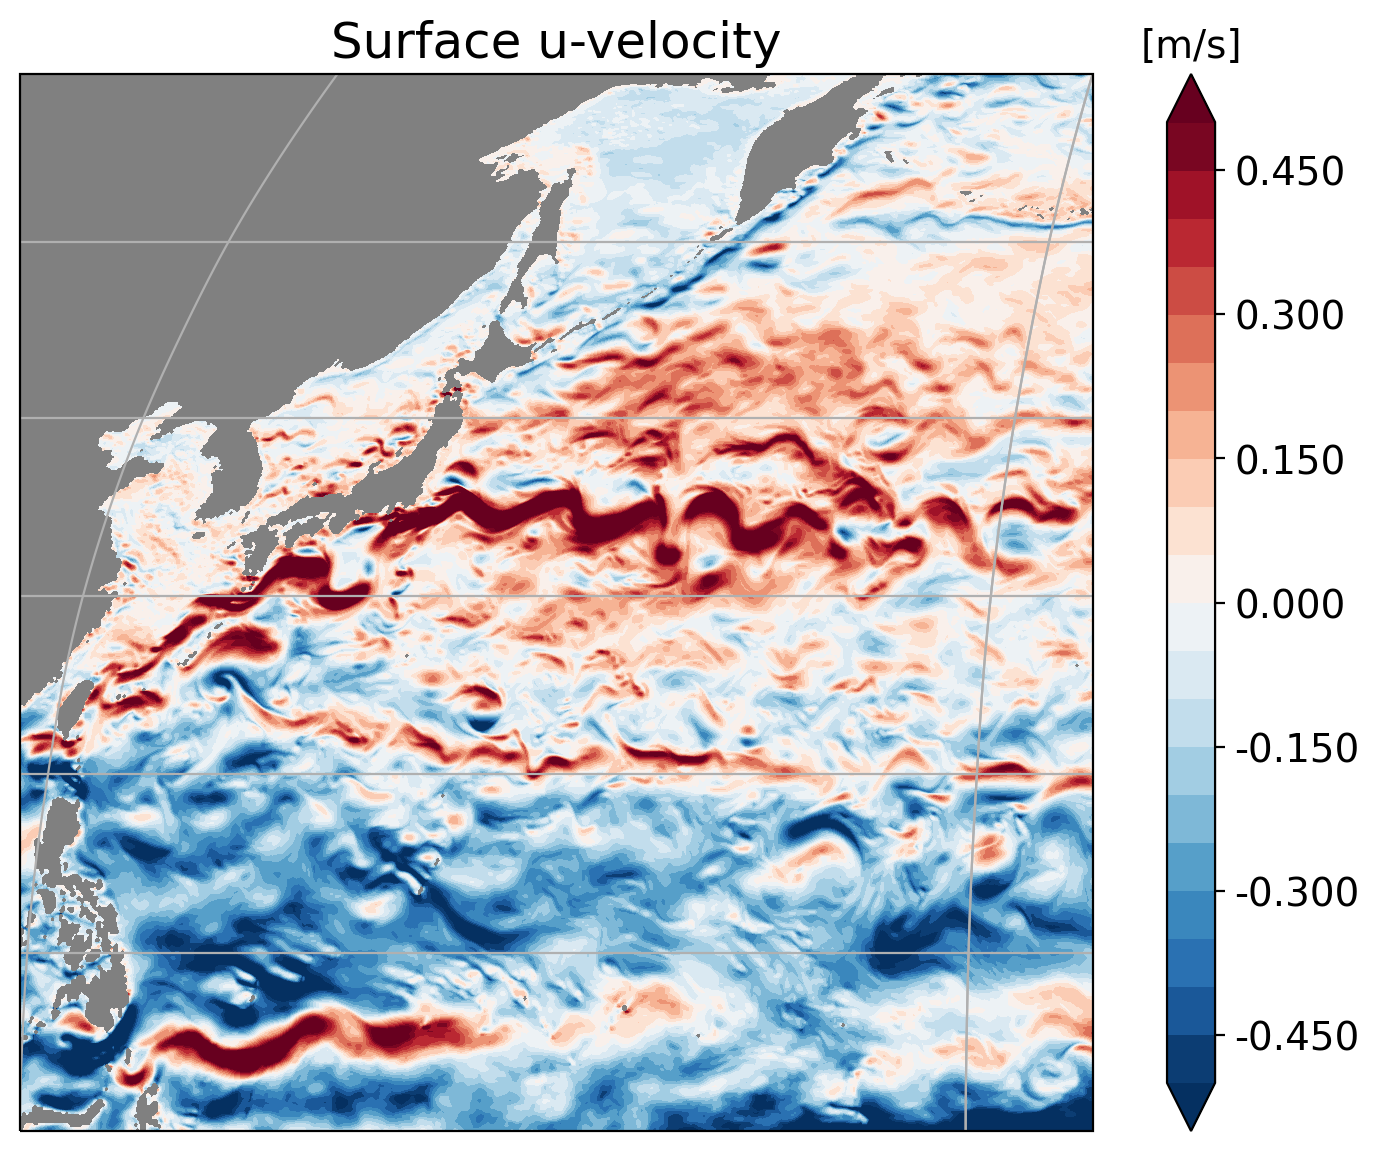

In [12]:
fig = plt.figure(figsize=(12, 7), dpi= 200, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-140))
ax.set_extent([-240, -180, 0, 60],ccrs.PlateCarree())

levels = np.linspace(-.5, .5, 21)
plt.pcolormesh(geolon, geolat,np.ones(dxu.shape),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
print('in progress')
plt.contourf(geolon,geolat,usurf_rounded,levels=levels,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both');
print('almost done')

cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.3f'); cbar.ax.tick_params(labelsize=14);
cbar.ax.set_title('[m/s]', fontsize=14)
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Surface u-velocity',fontsize=18)
plt.show()

### Plotting the unfiltered v velocity (note this takes several minutes to plot on the PlateCarree projection)

in progress
almost done


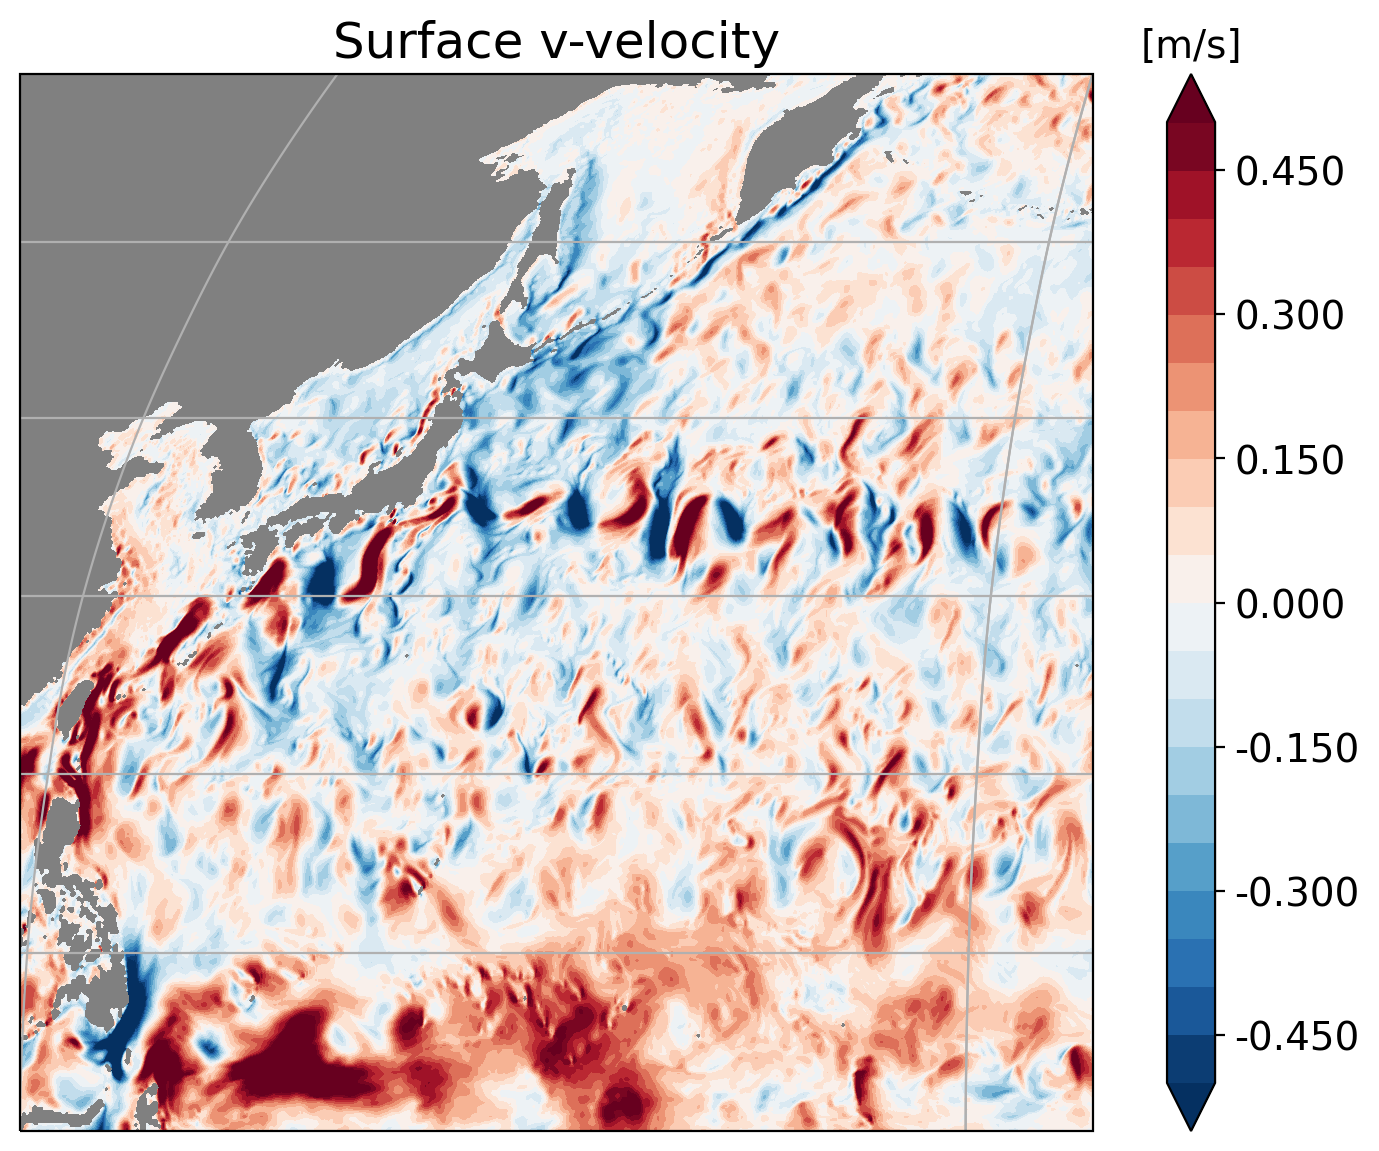

In [13]:
fig = plt.figure(figsize=(12, 7), dpi= 200, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-140))
ax.set_extent([-240, -180, 0, 60],ccrs.PlateCarree())

levels = np.linspace(-0.5, 0.5, 21)
plt.pcolormesh(geolon, geolat,np.ones(dxu.shape),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
print('in progress')
plt.contourf(geolon,geolat,vsurf_rounded,levels=levels,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both');
print('almost done')

cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.3f'); cbar.ax.tick_params(labelsize=14);
cbar.ax.set_title('[m/s]', fontsize=14)
gl=ax.gridlines(crs=ccrs.PlateCarree())
plt.title('Surface v-velocity',fontsize=18)
plt.show()

### Defining the Laplacian filter on a t-cell in MOM5 (B-grid)
We define our Laplacian filter based on the LAP_T operator in MOM5, for computing the lateral Laplacian of T-cell fields weighted by a diffusivity. See original code here:
https://github.com/mom-ocean/MOM5/blob/master/src/mom5/ocean_core/ocean_operators.F90

For grid variables see code here:
https://github.com/mom-ocean/MOM5/blob/master/src/mom5/ocean_core/ocean_grids.F90

The code involves the following steps.
First, we loop over i,j to solve for the first derivatives fx and fy:

    fx(i,j) = 0.5*(mix(i,j)+mix(i+1,j))*((a(i+1,j)-a(i,j))*Grd%dxter(i,j))*fmx_tmask(i,j,k)
    fy(i,j) = 0.5*(mix(i,j)+mix(i,j+1))*((a(i,j+1)-a(i,j))*Grd%dytnr(i,j))*fmy_tmask(i,j,k)
    
Here, **mix** is the mixing coefficient assumed to be centred on the T-cell (it is averaged to compute its value on the i-face and j-face for computing fluxes). **a** is the field to which the Laplacian is applied. **Grd%dxter** is the reciprocal of **dxte** which is distance to adjacent t cell to the east. **Grd%dytnr** is the reciprocal of **dytn** which is distance to adjacent t cell to the north.

Second, we again loop over i,j to compute the Laplacian:

    chg = (Grd%dyte(i,j)*fx(i,j) - Grd%dyte(i-1,j)*fx(i-1,j))*Grd%datr(i,j) &
          + (Grd%dxtn(i,j)*fy(i,j) - Grd%dxtn(i,j-1)*fy(i,j-1))*Grd%datr(i,j)
    LAP_T(i,j) = Grd%tmask(i,j,k)*chg

Here, **Grd%dyte** is height of eastern face of t cell, **Grd%datr** is the reciprocal of **dat** which is an area computed by multiplying **dxt** and **dyt** (the widths and heights of a t-cell, respectively). **Grd%dxtn** is width of northern face of t cell.

### Our implementation of the MOM5 Laplacian (B-grid)
The form of the Laplacian shown above is for fields defined on t cells. Here we transpose the above operations for a field defined on velocity cells. 

First, we loop over i,j to solve for the first derivatives fx and fy. Note that **mix** is already defined on the velocity points, so no need to average. We also drop the mask for now (land has NaN values in output). 

    fx(i,j) = (mix(i,j)*((a(i+1,j)-a(i,j))*1/(dxue(i,j)) 
    Use that dxue(i,j)=dxtn(i+1,j)~dxt(i+1,j) (approximate rectangular grid)
    fy(i,j) = (mix(i,j)*((a(i,j+1)-a(i,j))*1/(dyun(i,j)) 
    Use that dyun(i,j)=dyte(i,j+1)~dyt(i,j+1) (again approximate a rectangular grid)
    
#### So the final first derivatives become:

    fx(i,j) = (mix(i,j)*((a(i+1,j)-a(i,j))*1/(dxt(i+1,j))
    fy(i,j) = (mix(i,j)*((a(i,j+1)-a(i,j))*1/(dyt(i,j+1))
    
Second, we again loop over i,j to compute the Laplacian:

    chg = (dyue(i,j)*fx(i,j) - dyue(i-1,j)*fx(i-1,j))*1/(dau(i,j) &
        + (dxun(i,j)*fy(i,j) - dxun(i,j-1)*fy(i,j-1))*1/(dau(i,j)
    Approximate dyue(i,j)~dyu(i,j) and dxun(i,j)~dxu(i,j)

#### So the final second derivatives become:
    chg = (dyu(i,j)*fx(i,j) - dyu(i-1,j)*fx(i-1,j))*1/(dau(i,j) &
        + (dxu(i,j)*fy(i,j) - dxu(i,j-1)*fy(i,j-1))*1/(dau(i,j)
    LAP_U(i,j) = chg
    
For questions related to the grid and derivative definitions see Figure 9.7:
https://mom-ocean.github.io/assets/pdfs/MOM5_manual.pdf

In [7]:
# #Preparing the inputs
mix = np.ones(usurf.shape) #Array of the Laplacian coefficient values
print(usurf.shape)
print(vsurf.shape)
print(dxt.shape)
print(dyt.shape)
print(mix.shape)

(2700, 3600)
(2700, 3600)
(2700, 3600)
(2700, 3600)
(2700, 3600)


In [8]:
def MOM5_Laplacian_u(a, mix, dxt, dyt, dxu, dyu):
    #a is the field DEFINED ON U-CELL for which Laplacian is being computed
    #mix is the mixing coefficient assumed to be centered on the U-cell 
    #dxt is x-direction grid spacing for a t-cell
    #dyt is y-direction grid spacing for a t-cell
    #dxu is x-direction grid spacing for a u-cell
    #dyu is y-direction grid spacing for a u-cell

    #Initialize empty arrays for fx, fy (first derivatives), and LAP_U (final Laplacian result)
    fx = np.empty(a.shape)
    fy = np.empty(a.shape)
    LAP_U = np.empty(a.shape)
    
    for i in range(1,a.shape[0]-1):
        for j in range(a.shape[1]):
            fx[i,j]=mix[i,j]*(a[i+1,j]-a[i,j])/(dxt[i+1,j])              
    print('Computed fx')
    for i in range(a.shape[0]):
        for j in range(1,a.shape[1]-1):
            fy[i,j]=mix[i,j]*(a[i,j+1]-a[i,j])/(dyt[i,j+1]) 
    print('Computed fy') 
    for i in range(1,a.shape[0]-1):
        for j in range(1,a.shape[1]-1):
            LAP_U[i,j]=((dyu[i,j]*fx[i,j]-dyu[i-1,j]*fx[i-1,j])/dau[i,j]) + ((dxu[i,j]*fy[i,j]-dxu[i,j-1]*fy[i,j-1])/dau[i,j])
    print('Computed LAP_U')

    return LAP_U


In [9]:
u_laplacian=MOM5_Laplacian_u(usurf, mix, dxt, dyt, dxu, dyu)
v_laplacian=MOM5_Laplacian_u(vsurf, mix, dxt, dyt, dxu, dyu)

Computed fx
Computed fy
Computed LAP_U
Computed fx
Computed fy
Computed LAP_U


In [10]:
print(np.nanmean(u_laplacian))
print(np.nanmean(v_laplacian))

5.750516544421398e-13
1.982602765985226e-13


### Plotting the Laplacian of surface u-velocity

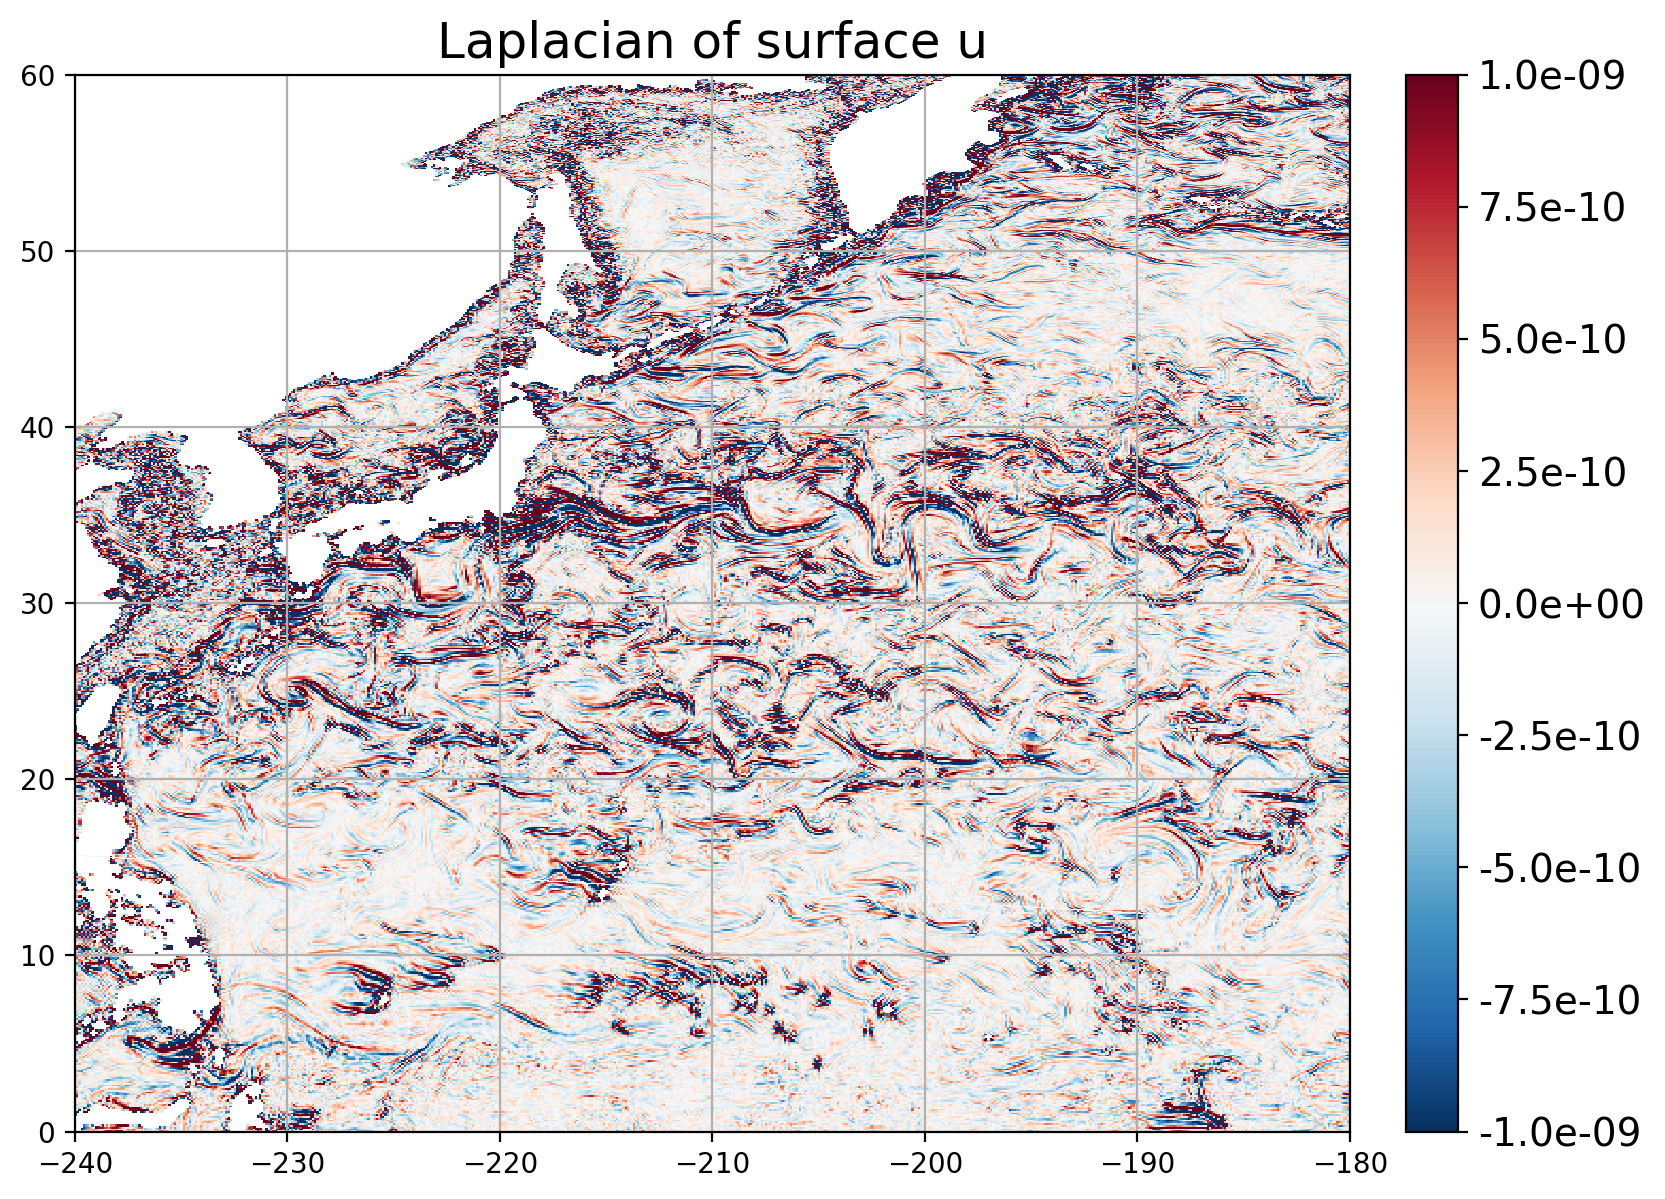

In [12]:
fig = plt.figure(figsize=(9, 7), dpi= 200, facecolor='w', edgecolor='k')

plt.pcolormesh(geolon,geolat,u_laplacian,cmap='RdBu_r',vmin=-1e-9,vmax=1e-9);
cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.1e'); cbar.ax.tick_params(labelsize=14);

#To isolate the western Pacific box uncomment this:
plt.xlim([-240,-180]); plt.ylim([0,60])
plt.grid('on')
plt.title('Laplacian of surface u',fontsize=18)
plt.show()

### Plotting the Laplacian of surface v-velocity

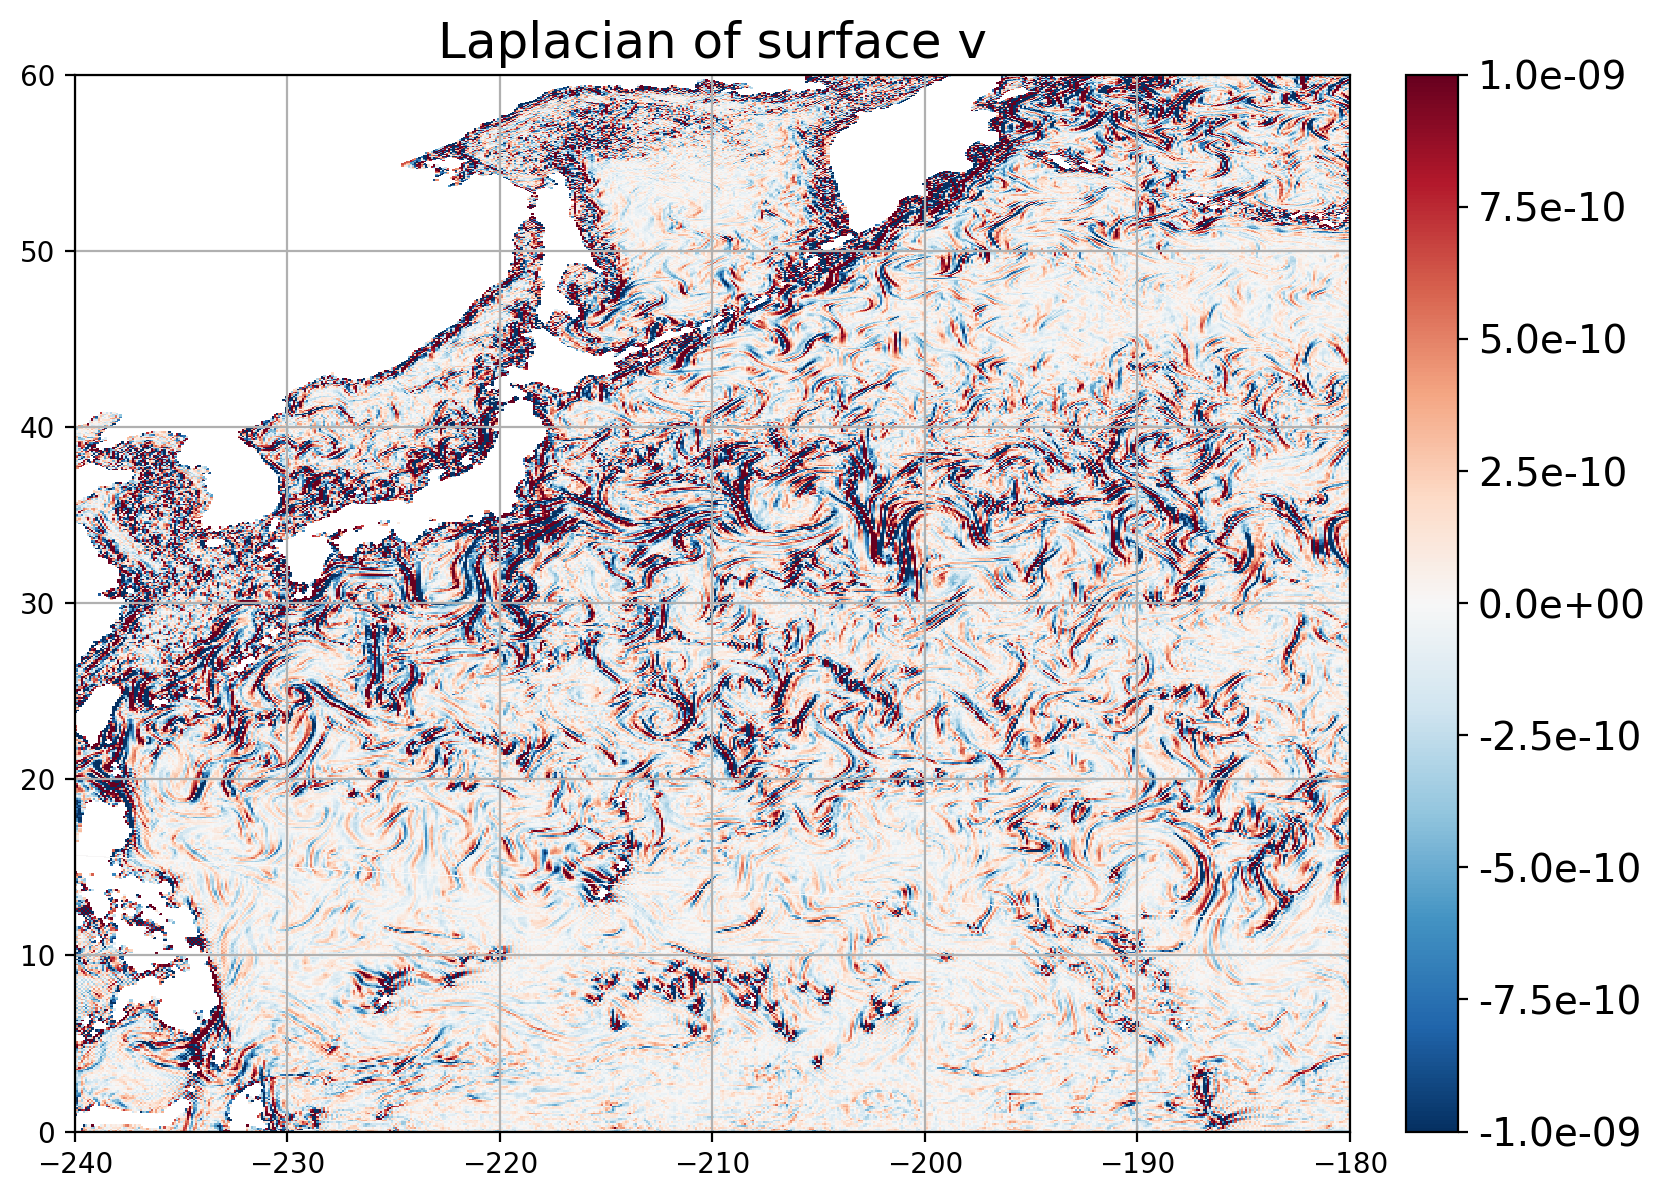

In [13]:
fig = plt.figure(figsize=(9, 7), dpi= 200, facecolor='w', edgecolor='k')

plt.pcolormesh(geolon,geolat,v_laplacian,cmap='RdBu_r',vmin=-1e-9,vmax=1e-9);
cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.1e'); cbar.ax.tick_params(labelsize=14);

#To isolate the western Pacific box uncomment this:
plt.xlim([-240,-180]); plt.ylim([0,60])
plt.grid('on')

plt.title('Laplacian of surface v',fontsize=18) #positive into ocean
plt.show()

### Defining the vorticity operator. The vorticity values are defined at u-points so that the MOM5 Laplacian defined at u-points may be utilized on the vorticity field.

    vorticity_z = 0.5*(
     (v(i,j) - v(i-1,j) )*Grd%dxtnr(i,j) +(v(i,j-1) - v(i-1,j-1))*Grd%dxtnr(i,j-1) &
    -(u(i,j) - u(i,j-1) )*Grd%dyter(i,j) -(u(i-1,j) - u(i-1,j-1))*Grd%dyter(i-1,j)
    ) 

In [17]:
def MOM5_vorticity(u, v, dxt, dyt):
    #u is the zonal velocity component (x-direction)
    #v is the meridional velocity component (y-direction)
    #dxt is x-direction grid spacing for a t-cell
    #dyt is y-direction grid spacing for a t-cell

    vorticity = np.empty(u.shape)
    
    for i in range(1,vorticity.shape[0]-1):
        for j in range(1,vorticity.shape[1]-1):
            dvdx=0.5*((v[i,j]-v[i-1,j])/(dxt[i,j]) + (v[i,j-1]-v[i-1,j-1])/(dxt[i,j-1]))
            dudy=0.5*((u[i,j]-u[i,j-1])/(dyt[i,j]) + (u[i-1,j]-u[i-1,j-1])/(dyt[i-1,j]))
            vorticity[i,j] = dvdx-dudy
    print('Computed vorticity')

    return vorticity

In [18]:
vorticity = MOM5_vorticity(usurf, vsurf, dxt, dyt)

Computed vorticity


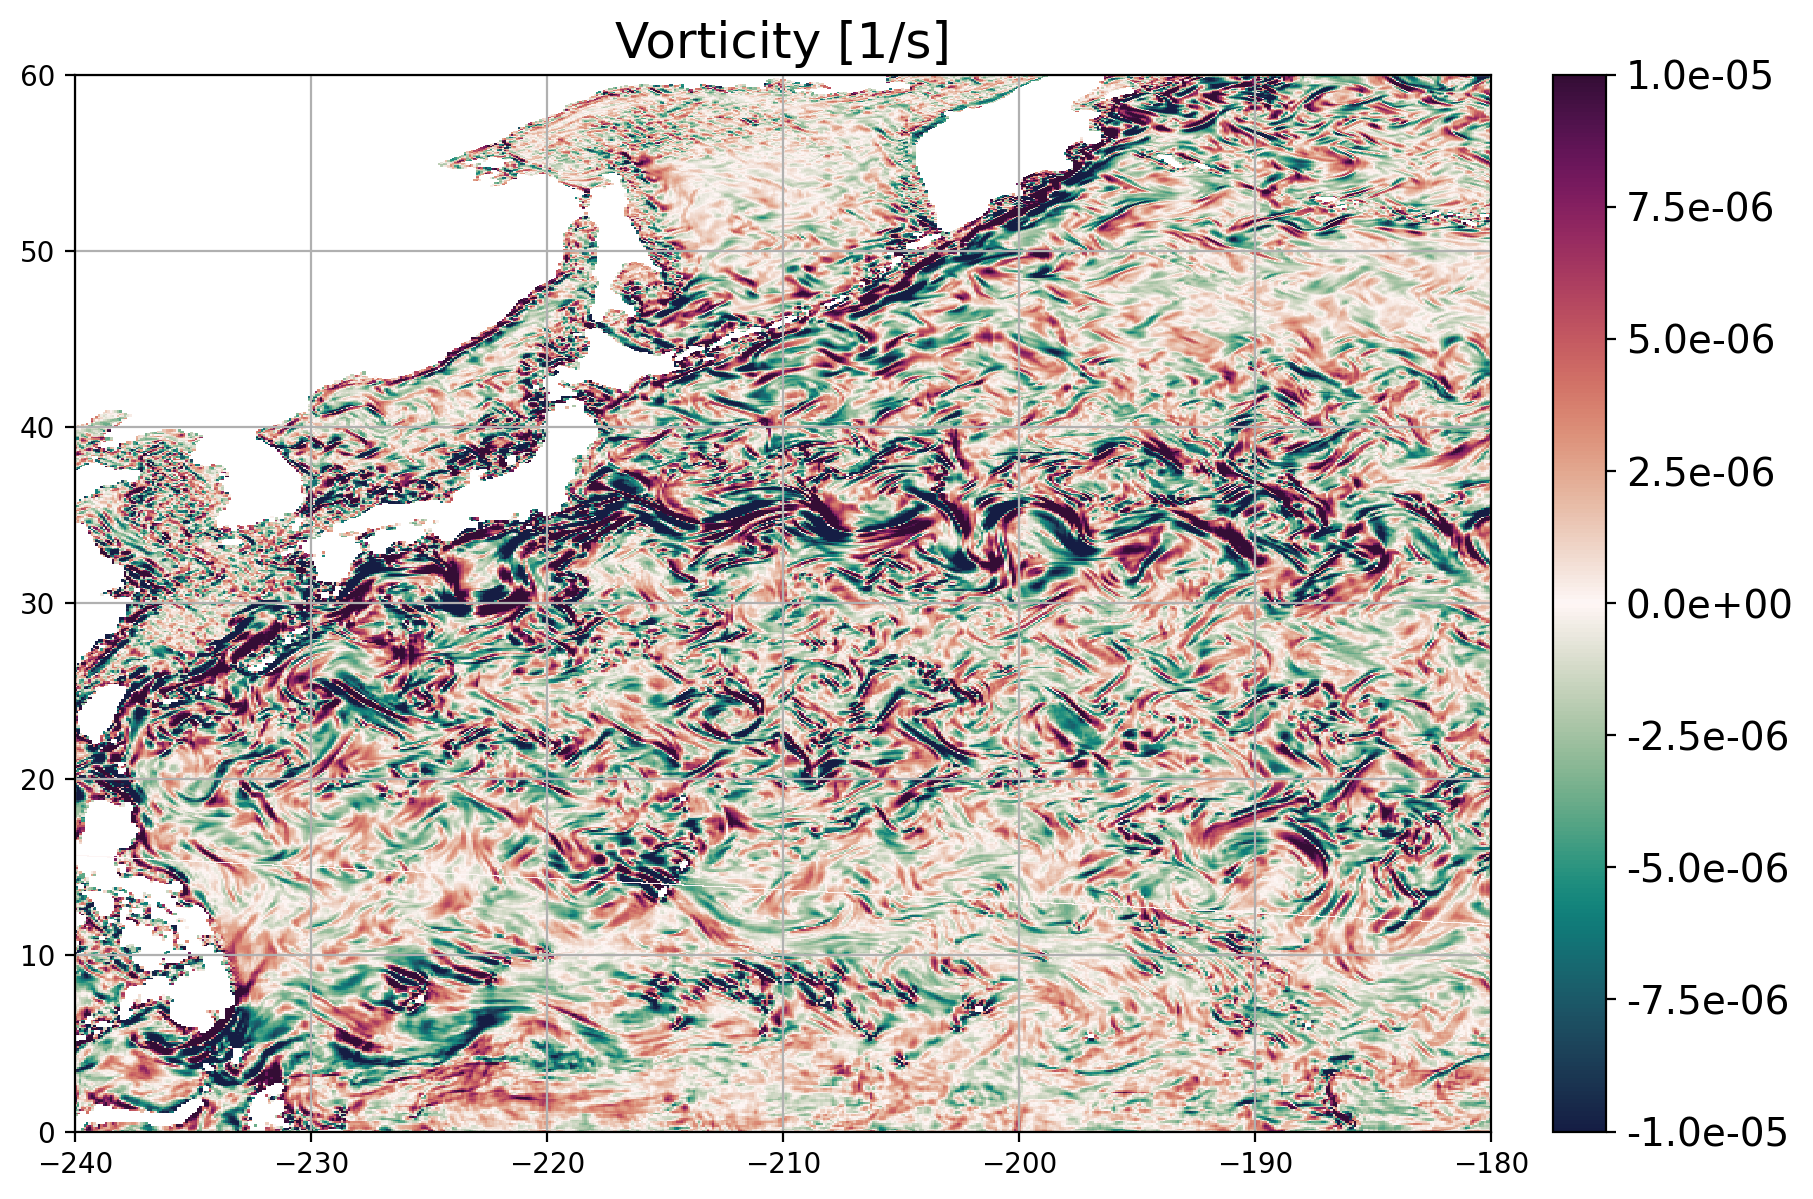

In [21]:
fig = plt.figure(figsize=(10, 7), dpi= 200, facecolor='w', edgecolor='k')

plt.pcolormesh(geolon,geolat,vorticity,cmap=cmocean.cm.curl,vmin=-1e-5,vmax=1e-5);
cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.1e'); cbar.ax.tick_params(labelsize=14);

#To isolate the western Pacific box uncomment this:
plt.xlim([-240,-180]); plt.ylim([0,60])
plt.grid('on')

plt.title('Vorticity [1/s]',fontsize=18) #positive into ocean
plt.show()

In [19]:
# fig = plt.figure(figsize=(12, 7), dpi= 200, facecolor='w', edgecolor='k')
# ax = plt.axes(projection=ccrs.Robinson(central_longitude=-140))
# ax.set_extent([-240, -180, 0, 60],ccrs.PlateCarree())

# levels = np.linspace(-1e-5, 1e-5, 11)
# plt.pcolormesh(geolon, geolat,np.ones(vorticity.shape),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=2);
# print('in progress')
# plt.contourf(geolon,geolat,vorticity,levels=levels,transform=ccrs.PlateCarree(),cmap=cmocean.cm.curl,extend='both');
# print('almost done')

# cbar=plt.colorbar(fraction=0.046, pad=0.04,format='%.3e'); cbar.ax.tick_params(labelsize=14);
# cbar.ax.set_title('[1/s]', fontsize=14)
# gl=ax.gridlines(crs=ccrs.PlateCarree())
# plt.title('Surface vorticity',fontsize=18)
# plt.show()